### Preparing the dataset

In [163]:
import pandas as pd
import numpy as np


In [164]:
df = pd.read_csv("jamb_exam_results.csv")

In [165]:
df

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,183,20,74,2,10.6,Public,Urban,Yes,No,Low,Low,4996,16,Male,Medium,Primary,2
4996,179,0,80,2,20.0,Public,Rural,No,Yes,Medium,Medium,4997,22,Male,Low,Secondary,1
4997,261,17,89,3,11.3,Public,Urban,No,No,Low,High,4998,18,Male,Medium,Primary,3
4998,183,15,96,2,15.9,Public,Rural,No,No,Low,Medium,4999,18,Male,Medium,Secondary,1


In [166]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [167]:
del df["student_id"]
df = df.fillna(0)

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=1)

In [170]:
from sklearn.feature_extraction import DictVectorizer

In [171]:
dv = DictVectorizer(sparse=True)

### Q1

In [172]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [173]:
y_train = df_train["jamb_score"]
del df_train["jamb_score"]

In [174]:
dict_train = df_train.to_dict(orient= "records")
X_train = dv.fit_transform(dict_train)


In [175]:
dt = DecisionTreeRegressor(max_depth = 1)

In [176]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [177]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



The feature used for splitting the data is study_hours_per_week

### Q2

In [178]:
from sklearn.ensemble import RandomForestRegressor

In [179]:
rf = RandomForestRegressor(n_estimators=10, random_state= 1, n_jobs=-1)
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [180]:
y_val = df_val["jamb_score"]
del df_val["jamb_score"]
dict_val = df_val.to_dict(orient= "records")
X_val = dv.transform(dict_val)

In [181]:

y_pred = rf.predict(X_val)

In [182]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return round(np.sqrt(mse),3)

In [183]:
score = rmse(y_val, y_pred)
print(score)
print(y_val)

42.137
913     204
1288    147
3551    199
2532    134
2678    222
       ... 
924     185
3282    133
2067    158
4332    244
4559    233
Name: jamb_score, Length: 1000, dtype: int64


the RMSE of this model on the validation data is 42.14 (close to the answer 42.13)

### Q3

In [184]:
print(y_pred)

[234.7 145.  195.2 139.4 196.8 249.9 222.5 211.1 164.3 222.9 201.2 172.5
 189.  202.7 169.9 138.8 160.9 131.7 179.5 128.3 189.1 139.1 198.2 194.2
 215.5 183.6 160.2 154.9 140.9 147.4 189.8 218.6 140.6 163.9 222.  140.
 150.4 191.1 165.1 168.1 180.4 142.7 191.9 150.8 121.9 154.8 182.1 194.1
 148.9 197.3 145.2 157.5 158.4 226.7 262.6 230.2 177.6 152.2 157.5 150.5
 199.2 160.1 143.5 157.2 141.2 209.1 260.3 178.4 198.5 149.3 186.3 148.4
 199.4 160.4 163.3 149.3 280.7 156.5 167.4 197.2 220.4 189.2 141.1 179.7
 201.8 145.  186.3 131.9 162.8 160.7 160.6 160.6 162.1 158.4 151.3 126.2
 147.6 176.8 180.7 171.8 134.  204.4 192.5 195.5 164.9 174.8 177.3 132.1
 207.6 126.8 186.4 175.9 184.8 155.3 253.3 145.3 220.3 168.4 204.2 160.7
 137.7 144.7 155.4 133.7 228.5 171.5 170.  202.2 172.2 152.1 165.8 133.6
 166.7 157.4 142.6 153.1 123.2 202.7 166.6 209.9 170.4 184.  127.2 220.2
 220.5 183.1 185.4 163.5 200.7 132.8 172.6 227.6 144.5 166.5 137.6 229.6
 149.5 197.6 203.9 163.3 248.3 201.  157.3 153.6 184

In [185]:
scores = []
for n in range(10,201,10):
    print(n)
    rf = RandomForestRegressor(n_estimators=n, random_state= 1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    score = rmse(y_val, y_pred)
    scores.append([n, score])
columns = ["n_estimators","rmse"]
df_scores = pd.DataFrame(scores, columns=columns)


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


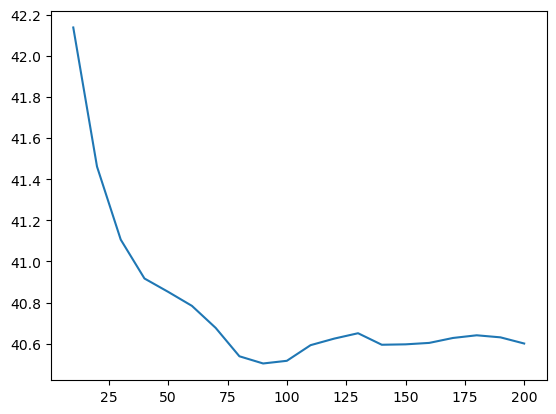

In [186]:
import matplotlib.pyplot as plt
plt.plot(df_scores.n_estimators, df_scores.rmse)

RMSE stop improving after n_estimators value approx to 80 - 90 . The correct answer is 80.

### Q4

In [187]:
scores = []
d_values = [10, 15, 20, 25]
for d in d_values:
    for n in range(10,201,10):
        rf = RandomForestRegressor(n_estimators=n, max_depth=d, random_state= 1, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        score = rmse(y_val, y_pred)
        scores.append([d, n, score])
columns = ["max_depth", "n_estimators","rmse"]
df_scores = pd.DataFrame(scores, columns=columns)

In [189]:
df_scores.groupby('max_depth').rmse.agg('mean')

max_depth
10    40.39240
15    40.73535
20    40.73970
25    40.78785
Name: rmse, dtype: float64

The best (smallest) max_depth, using the mean RMSE is 10 with mean rmse = 40.39240

### Q5

In [194]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state= 1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [196]:
rf.feature_importances_

array([0.0123254 , 0.01026189, 0.06931145, 0.03151679, 0.14972903,
       0.1364858 , 0.01345934, 0.00913136, 0.00928871, 0.01038263,
       0.01771934, 0.01240405, 0.00914148, 0.        , 0.01545036,
       0.01695692, 0.01448862, 0.02291885, 0.01335761, 0.01149201,
       0.00955909, 0.00923932, 0.0089532 , 0.00840598, 0.02571426,
       0.01070798, 0.01056268, 0.24835361, 0.08268222])

In [199]:
features = list(dv.get_feature_names_out())
feat_importance = rf.feature_importances_
#max_import_index = feat_importance.index(max(feat_importance))
max_import_index = np.argmax(feat_importance)
features[max_import_index]

'study_hours_per_week'

 the most important feature (among the 4 and among all) is  the most important feature

### Q6

In [202]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 325.1 kB/s eta 0:06:25
   ---------------------------------------- 0.1/124.9 MB 465.5 kB/s eta 0:04:29
   ---------------------------------------- 0.2/124.9 MB 1.5 MB/s eta 0:01:22
   ---------------------------------------- 0.7/124.9 MB 3.9 MB/s eta 0:00:32
    --------------------------------------- 2.0/124.9 MB 9.2 MB/s eta 0:00:14
   - -------------------------------------- 3.4/124.9 MB 12.7 MB/s eta 0:00:10
   - -------------------------------------- 5.2/124.9 MB 17.3 MB/s eta 0:00:07
   -- ------------------------------------- 7.2/124.9 MB 21.9 MB/s eta 0:00:06
   --- ------------------------------------ 9.5/124.9 MB 25.3 MB/s eta 0:00:05
   --- ------------------------------------ 10.7/124.9 MB 46.7 MB/s eta 0:00

In [203]:
import xgboost as xgb

In [226]:

dtrain = xgb.DMatrix(X_train, label = y_train, feature_names = features)
dval = xgb.DMatrix(X_val, label = y_val, feature_names = features)
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [227]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [234]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

In [235]:
parse_xgb_output(output).sort_values("val_rmse",ascending=True)

,num_iter,train_rmse,val_rmse
9,9,32.16019,40.43929
8,8,32.79415,40.45326
7,7,33.25929,40.47993
10,10,31.63404,40.48319
6,6,33.84230,40.59315
...,...,...,...
96,96,11.76819,43.39410
97,97,11.58218,43.40203
98,98,11.53812,43.40245
99,99,11.39140,43.41882


In [236]:
y_pred = model.predict(dval)
rmse(y_val, y_pred)

43.419

In [237]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

In [238]:
parse_xgb_output(output).sort_values("val_rmse",ascending=True)

,num_iter,train_rmse,val_rmse
28,28,32.02459,40.07263
27,27,32.16808,40.08567
26,26,32.33472,40.08693
31,31,31.59198,40.11982
25,25,32.55850,40.12003
...,...,...,...
4,4,40.96728,43.57339
3,3,41.90896,44.25755
2,2,42.94858,44.98366
1,1,44.12948,45.92344


In [239]:
y_pred = model.predict(dval)
rmse(y_val, y_pred)

41.05

The best eta value for the RMSE(smallest) on the validation dataset is eta = 0.1